Random Forest Algorithm

In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [167]:
df = pd.read_csv("ercot-dataset.csv", sep=',')
# to change the float to two decimal places following code is used
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(df)

                   Date  DryBulb  DewPnt  WetBulb  Humidity  ElecPrice  Day  \
0         1/1/2006 0:30    23.90   21.65    22.40     87.50      19.67    1   
1         1/1/2006 1:00    23.90   21.70    22.40     88.00      18.56    1   
2         1/1/2006 1:30    23.80   21.65    22.35     88.00      19.09    1   
3         1/1/2006 2:00    23.70   21.60    22.30     88.00      17.40    1   
4         1/1/2006 2:30    23.70   21.60    22.30     88.00      17.00    1   
...                 ...      ...     ...      ...       ...        ...  ...   
87643  31/12/2010 22:00    22.60   19.10    20.40     81.00      23.86   31   
87644  31/12/2010 22:30    22.45   19.05    20.30     81.50      26.49   31   
87645  31/12/2010 23:00    22.30   19.00    20.20     82.00      25.18   31   
87646  31/12/2010 23:30    22.05   19.05    20.15     83.50      26.19   31   
87647     1/1/2011 0:00    21.80   19.10    20.10     85.00      24.62    1   

       Month  Year  Minutes  SYSLoad  
0          1

In [168]:
# prints the high level information about the data
# df.info()

In [169]:
# gives additional statistical information
df.describe()

,DryBulb,DewPnt,WetBulb,Humidity,ElecPrice,Day,Month,Year,Minutes,SYSLoad
count,87648.00,87648.00,87648.00,87648.00,87648.00,87648.00,87648.00,87648.00,87648.00,87648.00
mean,18.26,11.92,14.88,68.90,42.40,15.73,6.52,2008.00,705.00,8894.00
std,4.89,5.47,4.29,16.86,215.64,8.80,3.45,1.41,415.60,1409.05
min,3.70,-8.40,2.50,7.00,-264.31,1.00,1.00,2006.00,0.00,5498.36
25%,14.70,8.00,11.60,58.00,21.80,8.00,4.00,2007.00,352.50,7879.67
50%,18.50,12.45,15.10,70.00,25.81,16.00,7.00,2008.00,705.00,8992.58
75%,21.80,16.35,18.40,82.50,36.94,23.00,10.00,2009.00,1057.50,9832.85
max,43.80,24.20,26.30,100.00,10000.00,31.00,12.00,2011.00,1410.00,14274.15


In [170]:
# to check the total missing data on each features
# zero indicates there is no missing data values
df.isnull().sum()
df1 = df.drop(['Date'], axis=1)

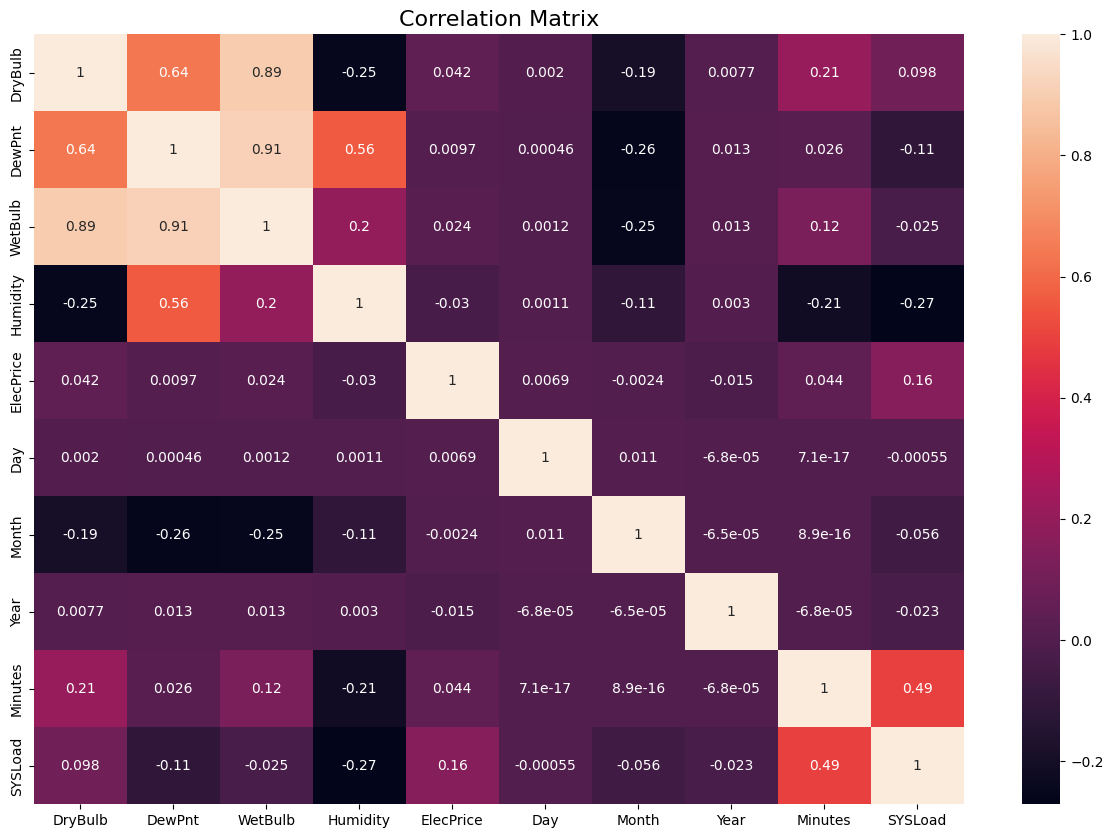

In [171]:
df1.corr()
# to see the correlation between features
# this helps to see how one parameters has effects on others
# lets see the plot of correlation data
sns.heatmap(df1.corr(), annot= True)
plt.rcParams["figure.figsize"]=(15,10)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

Importing the required libraries

In [172]:
# import sklearn libraries modules
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
# this will select all the rows and columns except the last one from df and assign to x variable
# df1 does not contain the date in the first column in string format
x = df1.iloc[:,:-1].values

# quality is taken target variable and it in last column and is assigned to y variable
y = df1.iloc[:,-1].values
print(len(x))
print(len(y))
# # encoding the categorical data
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [3])], remainder = 'passthrough')
# x = ct.fit_transform(x)

87648
87648


Splitting the dataset into the training and test set

In [173]:
# we will split the data into training and testing data using following code
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

Hyperparameter optimization using Randomized Search

In [174]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

def RandomForestRegressor_hpo(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features, bootstrap):
    # Creating a Random Forest Regression Model and Fitting it to the Training Data
    regr = RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features= max_features,bootstrap=bootstrap)
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    score = r2_score(y_test, y_pred)
    #print("R2_Score:", score)
    return score, y_pred

# Define the Random Forest Regressor
# rf_regressor = RandomForestRegressor_hpo()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor()
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, 
                                   param_distributions=param_grid, 
                                   n_iter=10, 
                                   cv=5, 
                                   scoring='neg_mean_squared_error',
                                   random_state=42,
                                   n_jobs=-1)

# Perform the search
random_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Negative Mean Squared Error:", best_score)


Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
Best Negative Mean Squared Error: -99932.3434226657


Assign best parameters to variables so that they could be used to run RF regression model

In [175]:
best_n_estimators = best_params[ 'n_estimators']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']
best_max_features = best_params['max_features']
best_bootstrap = best_params['bootstrap']

In [176]:
def RandomForestRegressor_hpo(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features, bootstrap):
    # Creating a Random Forest Regression Model and Fitting it to the Training Data
    regr = RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features= max_features,bootstrap=bootstrap)
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    score = r2_score(y_test, y_pred)
    #print("R2_Score:", score)
    return score, y_pred

In [177]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2_Score_returnvalue, y_pred = RandomForestRegressor_hpo(best_n_estimators, best_max_depth, best_min_samples_split, best_min_samples_leaf, best_max_features, best_bootstrap)

R2_score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("r2_score:", R2_score)

Mean Squared Error: 88282.42043920218
Mean Absolute Error: 215.2299617001827
r2_score: 0.9561120157218579


Predicted vs acutual data plot

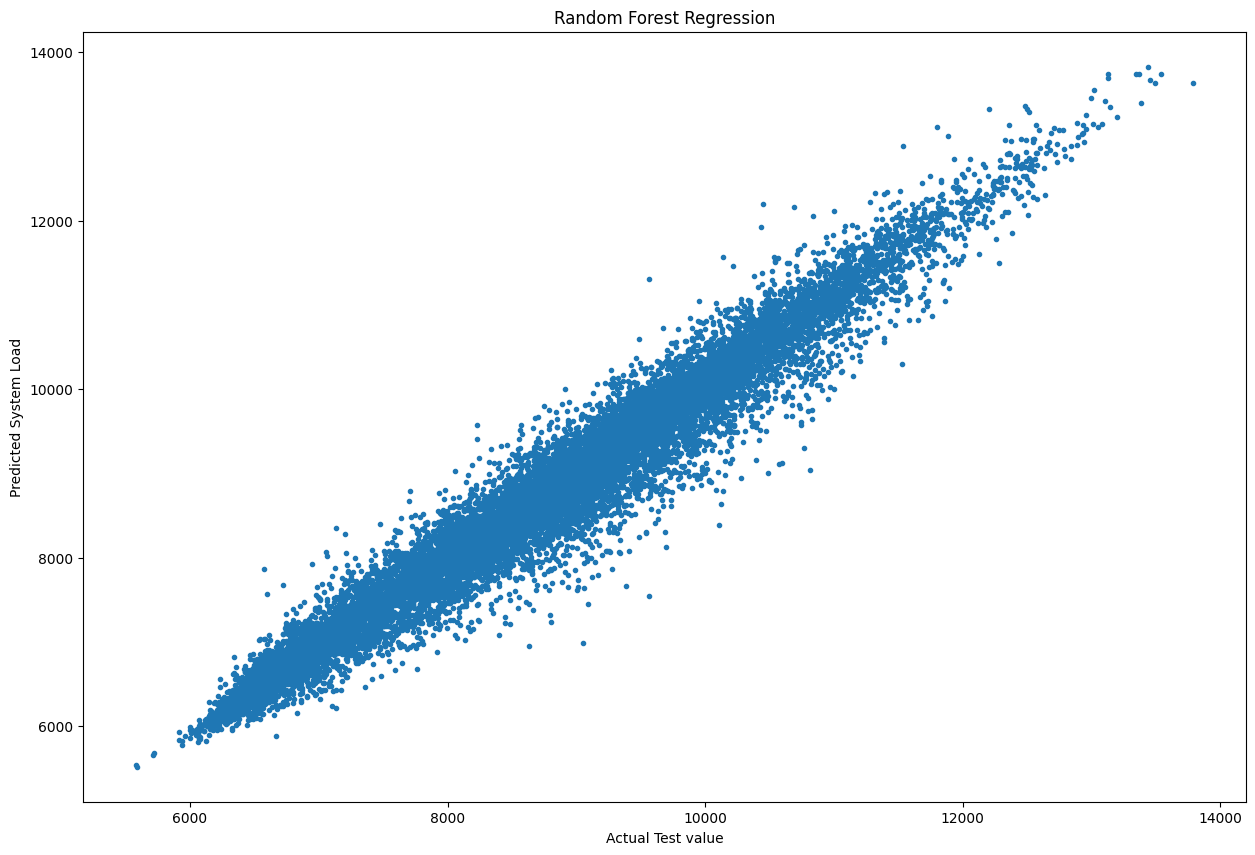

In [178]:
plt.plot(y_pred,y_test, '.')
#plt.plot(x_grid, regressor.predict(x_grid.reshape(-1,1)), color = 'blue')
plt.title('Random Forest Regression')
plt.xlabel('Actual Test value')
plt.ylabel('Predicted System Load')
plt.show()

Lets use the Bayesian Optimization technique for Random Forest Regression problem

In [179]:
from bayes_opt import BayesianOptimization
# Define a mapping from integer index to max_features value

def RandomForestRegressor_Bhpo(n_estimators, max_depth, min_samples_split, min_samples_leaf):
    # Creating a Random Forest Regression Model and Fitting it to the Training Data
    regr = RandomForestRegressor(n_estimators=int(n_estimators),max_depth=int(max_depth),min_samples_split=int(min_samples_split),
                                 min_samples_leaf=int(min_samples_leaf))
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    score = r2_score(y_test, y_pred)
    #print("R2_Score:", score)
    #return score, y_pred

    #print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {avg_train_loss}, Val Loss: {avg_val_loss}')

    # Evaluate the model on the test set
    mse = mean_squared_error(y_test, y_pred)
    return -mse

# Define the search space for hyperparameters
# pbounds = {'n_estimators': (10, 50, 100, 200), 'max_depth': (None, 10, 20, 30), 'min_samples_split': (2, 5, 10),
#     'min_samples_leaf': (1, 2, 4), 'max_features': ('sqrt', 'log2', None), 'bootstrap': (True, False)}

pbounds = {'n_estimators': (10, 200), 'max_depth': (3, 30), 'min_samples_split': (2, 10),
           'min_samples_leaf': (1, 4)}
max_features_options = {'sqrt', 'log2'}

# Initialize BayesianOptimization
optimizer = BayesianOptimization(
    f=RandomForestRegressor_Bhpo,
    pbounds=pbounds,
    random_state=42,
)

# Perform optimization
optimizer.maximize(init_points=5, n_iter=10)

# Get the best hyperparameters
best_params = optimizer.max['params']
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']

best_mse = RandomForestRegressor_Bhpo(best_n_estimators, best_max_depth, best_min_samples_split, best_min_samples_leaf)
print("Best Mean Squared Error:", -best_mse)  # Convert back to positive MSE
#r2_score(y_test, y_pred)

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | -1.629e+0 | 13.11     | 3.852     | 7.856     | 123.7     |
| 2         | -3.457e+0 | 7.213     | 1.468     | 2.465     | 174.6     |
| 3         | -1.089e+0 | 19.23     | 3.124     | 2.165     | 194.3     |
| 4         | -9.781e+0 | 25.48     | 1.637     | 3.455     | 44.85     |
| 5         | -2.048e+0 | 11.21     | 2.574     | 5.456     | 65.33     |
| 6         | -9.827e+0 | 26.22     | 1.911     | 3.991     | 43.92     |
| 7         | -1.106e+0 | 30.0      | 4.0       | 10.0      | 200.0     |
| 8         | -2.053e+0 | 11.9      | 1.0       | 2.0       | 29.19     |
| 9         | -1.051e+0 | 29.49     | 1.478     | 9.79      | 54.46     |
| 10        | -9.493e+0 | 30.0      | 1.0       | 2.0       | 98.43     |
| 11        | -2.331e+0 | 10.45     | 1.0       | 2.0       | 98.17     |
| 12        | -1.118e+0 | 30.0      | 

In [180]:
def RF_Bhpo(n_estimators, max_depth, min_samples_split, min_samples_leaf):
    # Creating a Random Forest Regression Model and Fitting it to the Training Data
    regr = RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    score = r2_score(y_test, y_pred)
    #print("R2_Score:", score)
    return score, y_pred

In [181]:
r2_Score_returnvalue, y_pred = RF_Bhpo(int(best_n_estimators), int(best_max_depth), int(best_min_samples_split), int(best_min_samples_leaf))

R2_score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("The Model performance parameter after HPO using Bayesian Optimization in RF algorithm:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("r2_score:", R2_score)

The Model performance parameter after HPO using Bayesian Optimization in RF algorithm:
Mean Squared Error: 95356.32605254126
Mean Absolute Error: 221.2872699124722
r2_score: 0.9525953534373537
